# Airline Tweets EDA and Modelling

Kernel steps;

1. [Import libraries](#h1)
2. [Load and first look dataset](#h2)
3. [EDA](#h3)
4. [Data cleaning and transformation](#h4)
5. [Model training](#h5)
    * [Future Extraction](#h51)
    * [Split train and test data](#h52)
    * [Random Forest Classifier](#h53)
6. [Model evaluate](#h6)

Good reading..

<h2 id="h1">1. Import Libraries</h2>

In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk as nlp
import re

import warnings
warnings.filterwarnings('ignore')

<h2 id="h2"> 2. Load and first look dataset</h2>

In [2]:
dataset = pd.read_csv("../input/Tweets.csv")
dataset.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [3]:
dataset.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Getting the data We want

In [4]:
data = dataset[["airline_sentiment","text","airline","retweet_count"]]
data.head()

,airline_sentiment,text,airline,retweet_count
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America,0
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America,0
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America,0


<h2 id="h3">3. EDA</h2>

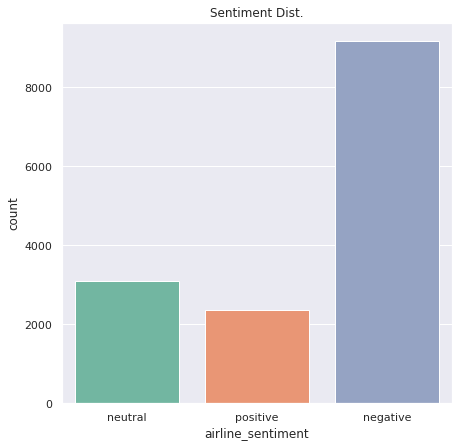

In [5]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=data["airline_sentiment"],palette="Set2")
plt.title("Sentiment Dist.")
plt.show()

* **We see that the overall comments are negative. This may mean that you are generally unhappy with airline companies. However, this may also be due to the nature of twitter.**

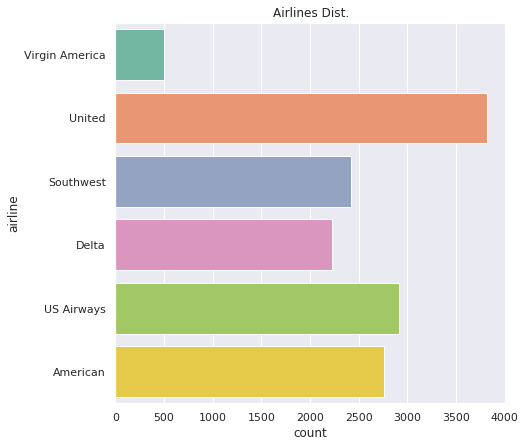

In [6]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(y=data["airline"],palette="Set2")
plt.title("Airlines Dist.")
plt.show()

* **United airline is popular on Twitter. Of course, we don't know if this popularity is positive or negative. In addition, the fact that virgin america has very few twits gives the impression that the standard is neither good nor bad.**

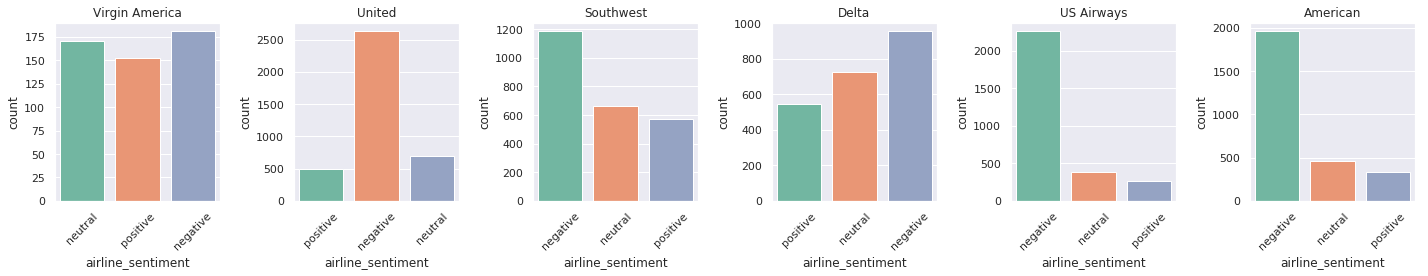

In [7]:
j=1
plt.subplots(figsize=(20,4),tight_layout=True)
for i in data["airline"].unique():
        x = data[data["airline"]==i]
        plt.subplot(1, 6, j)
        sns.countplot(x["airline_sentiment"],palette="Set2")
        plt.xticks(rotation=45)
        plt.title(i)
        j +=1
plt.show()

* **We are now able to comment on the emotions of the twits about companies. The United airline mentioned above has a very bad reputation in twitter. They also have negative reviews, which can be said that The United airline,US Airways and American offer poor service and have very bad reputation..**

<h2 id="h4"> 4. Data cleaning and tranformation </h2>

In the following, the twits are **removed from unnecessary characters**, **converted to lowercase** letters, **separated into words** and their **roots are obtained**. 

In [8]:
lemma = nlp.WordNetLemmatizer()
def preprocess(x):
    x = str(x)
    x = re.sub("[^a-zA-z]", " ",x)
    x = x.lower()
    x = nlp.word_tokenize(x)
    #x = [i for i in x if not i in set(stopwords.words("english"))] #slowly
    x = [lemma.lemmatize(i) for  i in x]
    x = " ".join(x)
    return x

data.text = data.text.apply(preprocess)
data.text[0:10]

0                     virginamerica what dhepburn said
1    virginamerica plus you ve added commercial to ...
2    virginamerica i didn t today must mean i need ...
3    virginamerica it s really aggressive to blast ...
4    virginamerica and it s a really big bad thing ...
5    virginamerica seriously would pay a flight for...
6    virginamerica yes nearly every time i fly vx t...
7    virginamerica really missed a prime opportunit...
8           virginamerica well i didn t but now i do d
9    virginamerica it wa amazing and arrived an hou...
Name: text, dtype: object

We can creating word count now. We should did this in EDA but let's take a look :)

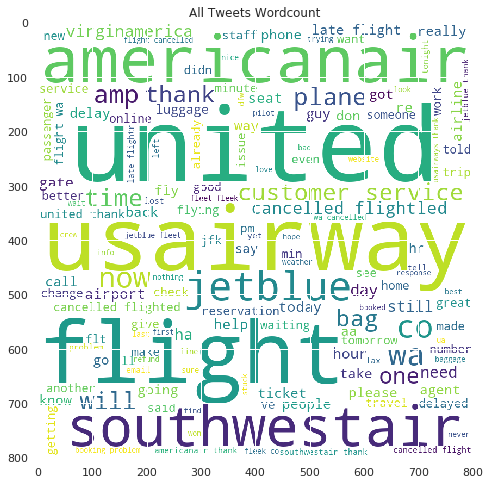

In [9]:
allcomments = " ".join(data.text)
wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 12).generate(allcomments) 
      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("All Tweets Wordcount")
plt.show()

* **At this wordcloud was talked about thats ; flights, jetblue, americanair, southwestair, usairway, customer sevices, late flights, ticket, seat, cancelled filight.**

In this work, We will try predict sentiment by twits. So, get sentment and text from data.

In [10]:
#data=data[["airline_sentiment","text"]]
#data.head()

We need transform sentiments to numeric.

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["airline_sentiment"] = encoder.fit_transform(data["airline_sentiment"])
print(encoder.classes_)
data.head()

['negative' 'neutral' 'positive']


,airline_sentiment,text,airline,retweet_count
0,1,virginamerica what dhepburn said,Virgin America,0
1,2,virginamerica plus you ve added commercial to ...,Virgin America,0
2,1,virginamerica i didn t today must mean i need ...,Virgin America,0
3,0,virginamerica it s really aggressive to blast ...,Virgin America,0
4,0,virginamerica and it s a really big bad thing ...,Virgin America,0


In [12]:
# convert to categorical Categority by using one hot tecnique 
df_dummy = data.copy()
df_dummy.airline = pd.Categorical(df_dummy.airline)
x = df_dummy[['airline']]
del df_dummy['airline']
dummies = pd.get_dummies(x, prefix = 'airline')
data = pd.concat([df_dummy,dummies], axis=1)
data.head()

,airline_sentiment,text,retweet_count,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1,virginamerica what dhepburn said,0,0,0,0,0,0,1
1,2,virginamerica plus you ve added commercial to ...,0,0,0,0,0,0,1
2,1,virginamerica i didn t today must mean i need ...,0,0,0,0,0,0,1
3,0,virginamerica it s really aggressive to blast ...,0,0,0,0,0,0,1
4,0,virginamerica and it s a really big bad thing ...,0,0,0,0,0,0,1


In [13]:
#normalize retweet count
_max = data.retweet_count.describe()[7]
data.retweet_count = [i/_max for i in data.retweet_count]

<h2  id="h5">5. Model Training</h2>

<h3 id="h51"> 5.1 Future Extraction </h3>

I used **Tfidf to embedding** text.

In [14]:
#Encode Words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = "english")
encoded_X = vectorizer.fit_transform(data.text).toarray()
print(encoded_X.shape)
print("Features First 100:",vectorizer.get_feature_names()[:100])

(14640, 12427)
Features First 100: ['__rwg__', '_austrian', '_defcon_', '_emmaclifford', '_exact_', '_justdippin_', '_lucy_may', '_robprice', '_wtvd', 'a_life_story_', 'aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadv', 'aadvantage', 'aafail', 'aakjumxa', 'aal', 'aaron', 'aarp', 'aateam', 'aau', 'aavvoreph', 'aay', 'ab', 'aback', 'abandon', 'abandoned', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abcletjetbluestreamfeed', 'abcnetwork', 'abcnews', 'abducted', 'abi', 'abigailedge', 'ability', 'able', 'aboard', 'aboout', 'abounds', 'abprg', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtwf', 'abundance', 'abuse', 'abused', 'abxrq', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'accepted', 'accepting', 'acces', 'access', 'accessibility', 'accessible', 'accessing', 'accident', 'accidentally', 'accomidating', 'accommodate', 'accommodated

In [15]:
data2 = data.copy()
del data2["text"]
data2 = pd.concat([pd.DataFrame(encoded_X),data2], axis=1)
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,12425,12426,airline_sentiment,retweet_count,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0.0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0.0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0.0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0,0,0,0,1


In [16]:
X = data2.drop(["airline_sentiment"],axis=1)
y = data2.airline_sentiment

<h3 id="h52"> 5.2 Split train and test data </h3>

In [17]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=22)
print("Train :",X_train.shape)
print("Test  :",X_test.shape)

Train : (10980, 12434)
Test  : (3660, 12434)


Check test distrubution.

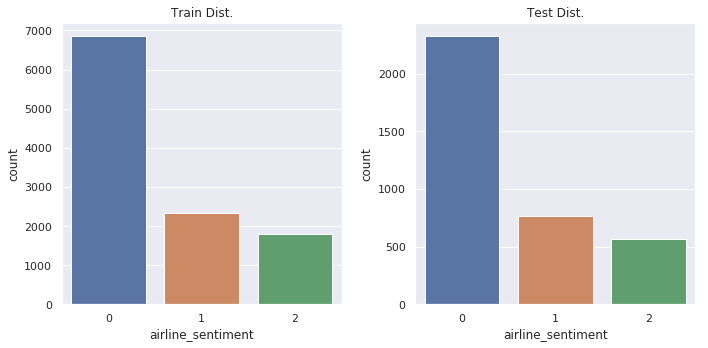

In [18]:
sns.set()
plt.subplots(figsize=(10,5),tight_layout=True)
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("Train Dist.")
plt.subplot(1,2,2)
sns.countplot(y_test)
plt.title("Test Dist.")
plt.show()

<h3 id="h53"> 5.3 Random Forest Classifier </h3>

In [19]:
#Classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

<h2 id="h6">6. Model evaluation </h2>

In [20]:
#Result
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rf_acc = accuracy_score(y_test, pred)
rf_f1 = f1_score(y_test, pred, average="micro")

print("Random Forest")
print("Accuracy : %",round(rf_acc*100,2))
print("F1 Score : %",round(rf_f1*100,2))

Random Forest
Accuracy : % 75.41
F1 Score : % 75.41


<h4>Thanks. If you like this kernel, please upvote and comment :)</h4>